In [ ]:
import tensorflow as tf 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [ ]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1 

print(tokenizer.word_index)
print(total_words)


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
len(corpus), len(tokenizer.word_index)

(64, 262)

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

#pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label 
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)


In [ ]:
print(tokenizer.word_index['in']),  print(tokenizer.word_index['the']), print(tokenizer.word_index['town']), print(tokenizer.word_index['of']),print(tokenizer.word_index['athy']), print(tokenizer.word_index['one']), print(tokenizer.word_index['jeremy']), print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


(None, None, None, None, None, None, None, None)

In [ ]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [ ]:
ys[6]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [ ]:
model = Sequential([
                    tf.keras.layers.Embedding(total_words, 8),
                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1)),
                    tf.keras.layers.Dense(total_words, activation='softmax')

])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(xs, ys, epochs=1500, verbose=1)

Epoch 1/1500
15/15 [==============================] - 4s 7ms/step - loss: 5.5706 - accuracy: 0.0270
Epoch 2/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.5594 - accuracy: 0.0582
Epoch 3/1500
15/15 [==============================] - 0s 7ms/step - loss: 5.5465 - accuracy: 0.0377
Epoch 4/1500
15/15 [==============================] - 0s 7ms/step - loss: 5.5053 - accuracy: 0.0556
Epoch 5/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.4012 - accuracy: 0.0568
Epoch 6/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.2738 - accuracy: 0.0458
Epoch 7/1500
15/15 [==============================] - 0s 6ms/step - loss: 5.1142 - accuracy: 0.0517
Epoch 8/1500
15/15 [==============================] - 0s 7ms/step - loss: 5.0821 - accuracy: 0.0513
Epoch 9/1500
15/15 [==============================] - 0s 7ms/step - loss: 5.0453 - accuracy: 0.0416
Epoch 10/1500
15/15 [==============================] - 0s 6ms/step - loss: 4.9936 - accuracy: 0.0476

In [ ]:
%matplotlib inline 

import matplotlib.pyplot as plt 

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.show()

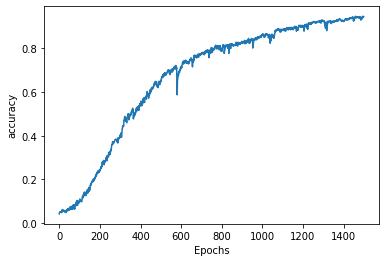

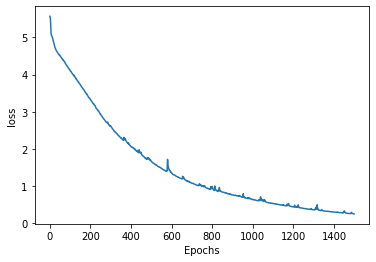

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
seed_text = 'in the town of Athy'
next_words = 10
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding='pre')

predicted = np.argmax(model.predict(token_list), axis=-1)
predicted

array([68])

In [ ]:
seed_text = "Sweet Jeremy saw Dublin"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)

  output_word = ""

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break 
  seed_text += " " + output_word
print(seed_text)

Sweet Jeremy saw Dublin the big big lanigan eyes again pipes father together round


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2021-04-10 22:27:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2021-04-10 22:27:37 (117 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [ ]:
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower().split("\n")

In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1 

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [ ]:
window_size=10
sentences = []
alltext = []
data = open('/tmp/irish-lyrics-eof.txt').read()
corpus = data.lower()
words = corpus.split(" ")
range_size = len(words) - max_sequence_len
for i in range(0, range_size):
  thissentence=""
  for word in range(0, window_size-1):
    word = words[i+word]
    thissentence = thissentence + word
    thissentence = thissentence + " "
  sentences.append(thissentence)


In [ ]:
sentences

['come all ye maidens young and fair\nand you that ',
 'all ye maidens young and fair\nand you that are ',
 'ye maidens young and fair\nand you that are blooming ',
 'maidens young and fair\nand you that are blooming in ',
 'young and fair\nand you that are blooming in your ',
 'and fair\nand you that are blooming in your prime\nalways ',
 'fair\nand you that are blooming in your prime\nalways beware ',
 'you that are blooming in your prime\nalways beware and ',
 'that are blooming in your prime\nalways beware and keep ',
 'are blooming in your prime\nalways beware and keep your ',
 'blooming in your prime\nalways beware and keep your garden ',
 'in your prime\nalways beware and keep your garden fair\nlet ',
 'your prime\nalways beware and keep your garden fair\nlet no ',
 'prime\nalways beware and keep your garden fair\nlet no man ',
 'beware and keep your garden fair\nlet no man steal ',
 'and keep your garden fair\nlet no man steal away ',
 'keep your garden fair\nlet no man steal a

In [ ]:
corpus = sentences

In [ ]:
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

#pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label 
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

model = Sequential([
                    tf.keras.layers.Embedding(total_words, 8),
                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(max_sequence_len-1, return_sequences=True)),
                    tf.keras.layers.Bidirectional(LSTM(max_sequence_len-1)),
                    tf.keras.layers.Dense(total_words, activation='softmax')

])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/5
3483/3483 [==============================] - 155s 43ms/step - loss: 6.3336 - accuracy: 0.0664
Epoch 2/5
3483/3483 [==============================] - 148s 43ms/step - loss: 5.7005 - accuracy: 0.0934
Epoch 3/5
3483/3483 [==============================] - 147s 42ms/step - loss: 5.2953 - accuracy: 0.1173
Epoch 4/5
3483/3483 [==============================] - 148s 43ms/step - loss: 5.0269 - accuracy: 0.1237
Epoch 5/5
3483/3483 [==============================] - 147s 42ms/step - loss: 4.7958 - accuracy: 0.1372


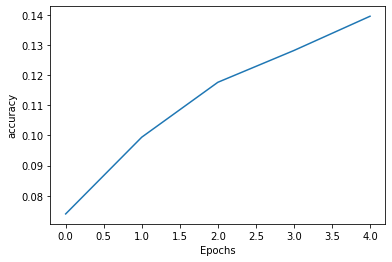

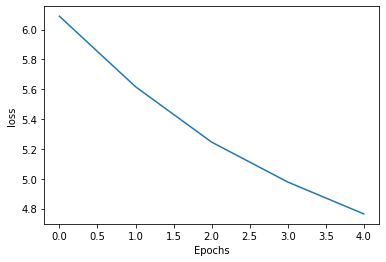

In [ ]:
history = model.fit(xs, ys, epochs=5, verbose=1)
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
seed_text = 'in the town of Athy'
next_words = 10
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding='pre')

predicted = np.argmax(model.predict(token_list), axis=-1)
predicted

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
predicted

array([5])

In [ ]:
seed_text = "Sweet Jeremy saw Dublin"
next_words = 10

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len - 1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)

  output_word = ""

  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break 
  seed_text += " " + output_word
print(seed_text)

Sweet Jeremy saw Dublin and a ball and the sea and the sea and
